<a href="https://colab.research.google.com/github/AlonsoCarr/Repositorio_IA_Alonso/blob/main/RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Actividad 5: Uso de software para búsqueda
#Nombre: Alonso Carrizales Mancilla
#Matrícula: 2001625
#Hora: N4

In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [3]:
digit_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

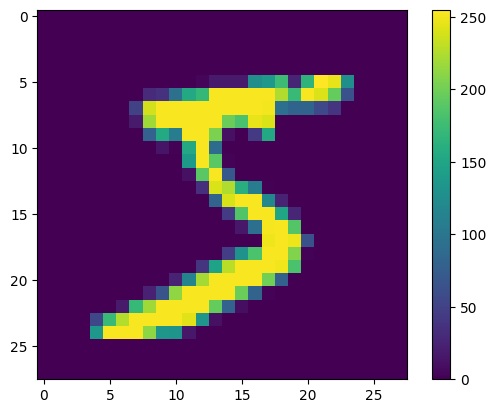

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

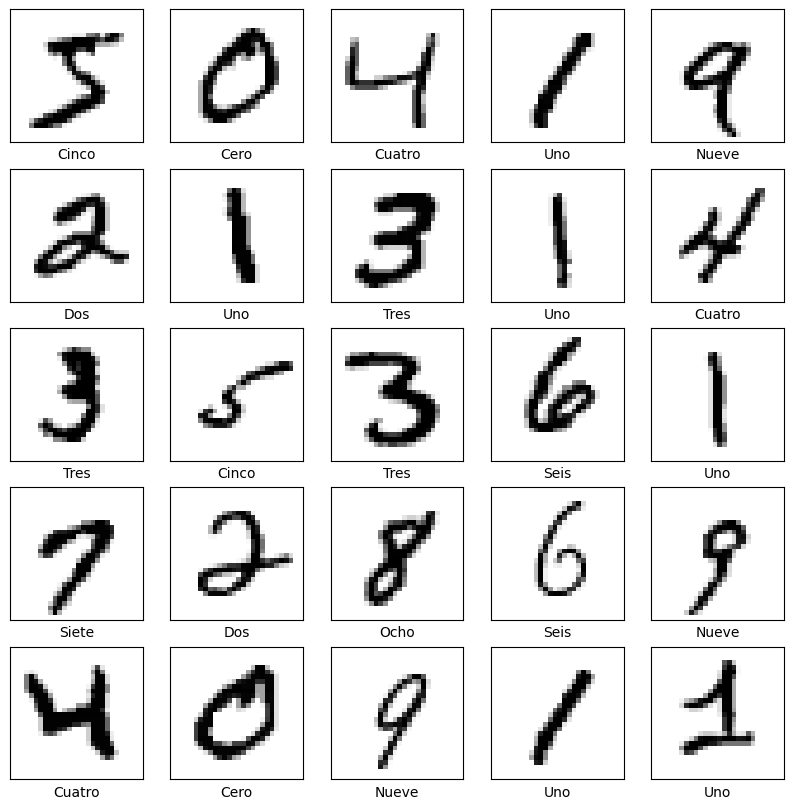

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2541 - accuracy: 0.9277
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1112 - accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0770 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0581 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0437 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0359 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0228 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0191 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0777 - accuracy: 0.9778 - 827ms/epoch - 3ms/step

Test accuracy: 0.9778000116348267


In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [18]:
predictions[0]

array([1.2317224e-12, 3.8390496e-10, 7.2148536e-09, 2.2935552e-05,
       8.3289895e-17, 6.8013097e-09, 2.7081458e-17, 9.9997693e-01,
       1.4585355e-09, 9.7371739e-08], dtype=float32)

In [19]:
np.argmax(predictions[0])

7

In [20]:
test_labels[0]

7

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

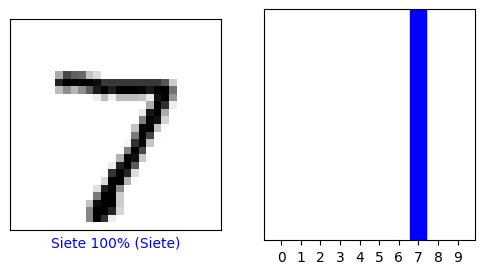

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

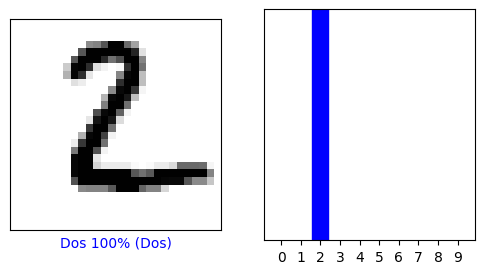

In [23]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

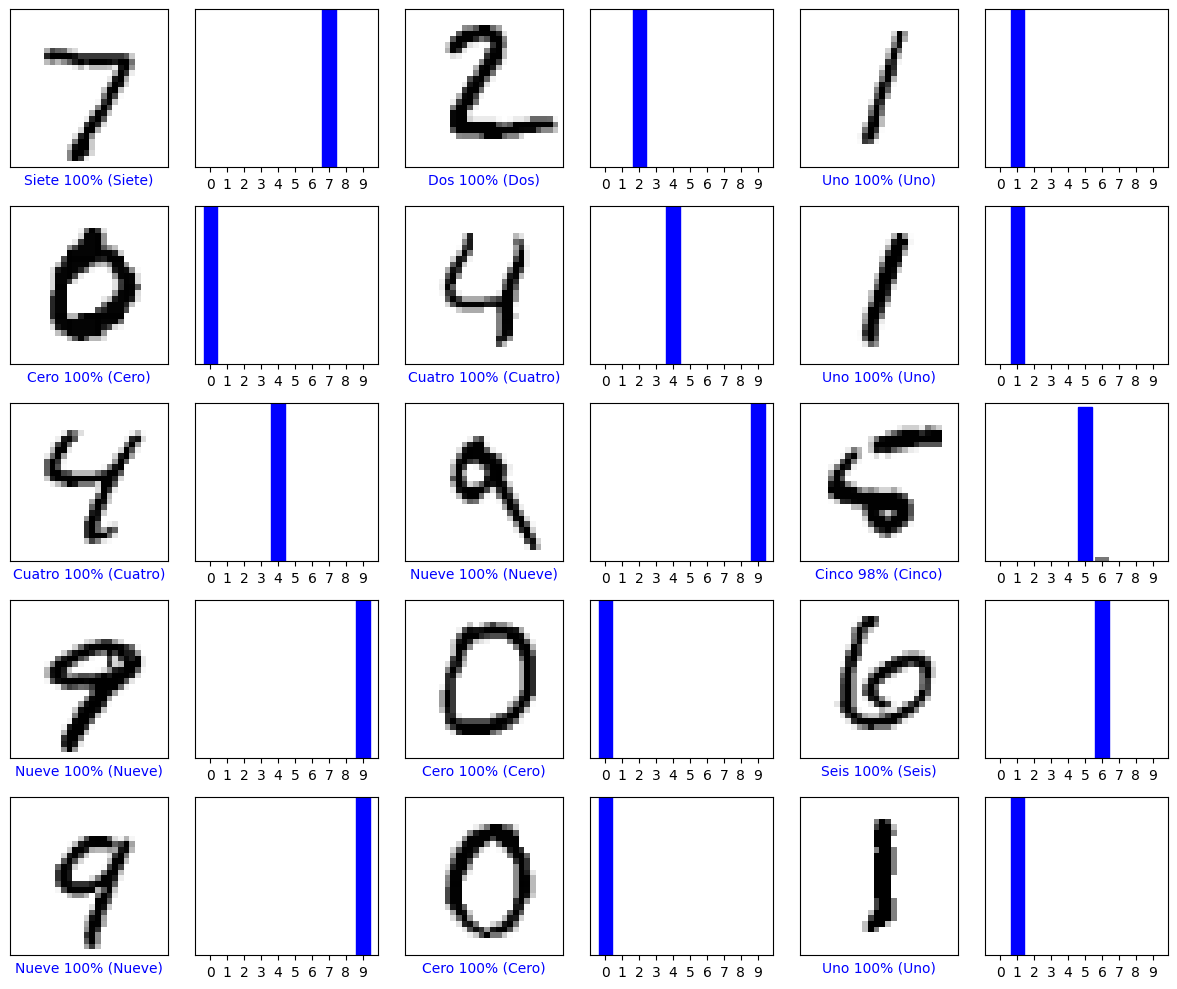

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Predicción 1

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 22ms/step
Predicción:
[[1.6955819e-07 2.3404539e-07 8.8894251e-07 6.4954264e-08 2.4743317e-08
  2.2480768e-05 9.9997616e-01 2.8494895e-10 4.3306763e-08 3.4302092e-11]]

Número de etiqueta


6

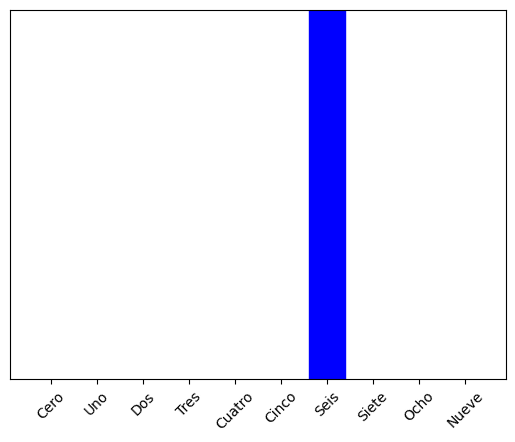

In [25]:
# Predicción de Imagenes
print('Predicción 1')
print('')

img = test_images[50]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(50, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])


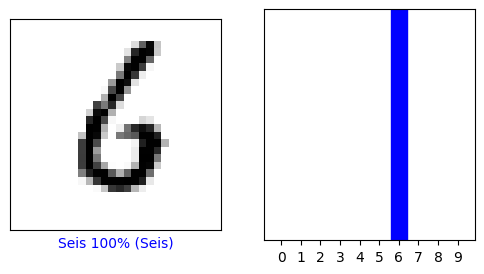

In [26]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción 2

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 21ms/step
Predicción:
[[2.3969689e-14 8.0110278e-13 1.1357419e-07 9.9999988e-01 2.3511936e-15
  2.0134365e-10 3.3044083e-18 6.1815558e-10 1.4709615e-10 1.4780773e-17]]

Número de etiqueta


3

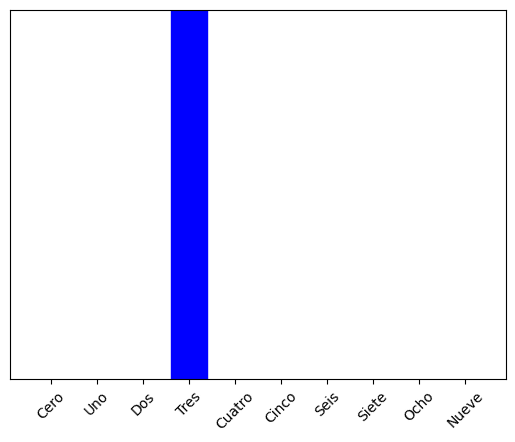

In [27]:
# Predicción de Imagenes
print('Predicción 2')
print('')

img = test_images[51]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(51, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

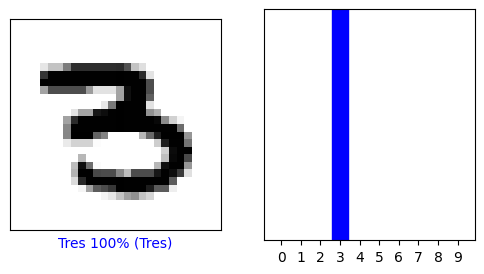

In [28]:
i = 51
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción 3

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 24ms/step
Predicción:
[[7.7151924e-10 2.7095379e-10 9.4878619e-13 2.8761946e-07 1.4249054e-12
  9.9992454e-01 1.9152042e-09 5.0269167e-10 4.4629314e-09 7.5251643e-05]]

Número de etiqueta


5

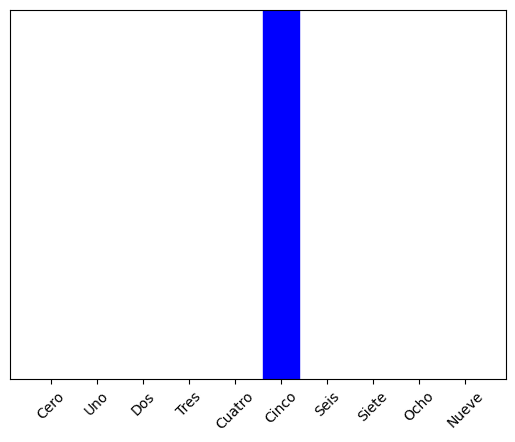

In [29]:
# Predicción de Imagenes
print('Predicción 3')
print('')

img = test_images[52]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(52, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

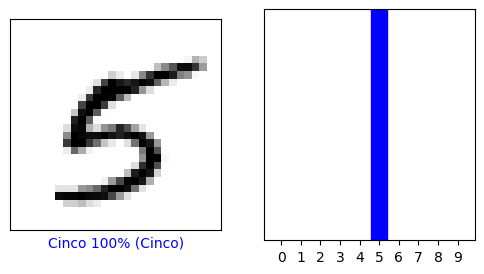

In [30]:
i = 52
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción 4

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 22ms/step
Predicción:
[[3.3439107e-09 7.9415259e-11 2.5182531e-10 1.0514480e-05 4.1524304e-09
  9.9993885e-01 6.5300149e-08 5.2526761e-10 3.0749961e-05 1.9810450e-05]]

Número de etiqueta


5

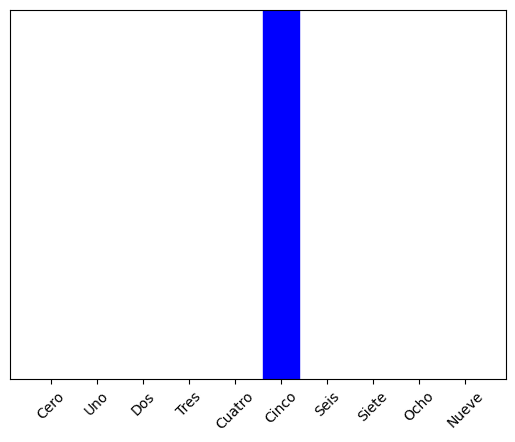

In [31]:
# Predicción de Imagenes
print('Predicción 4')
print('')

img = test_images[53]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(53, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

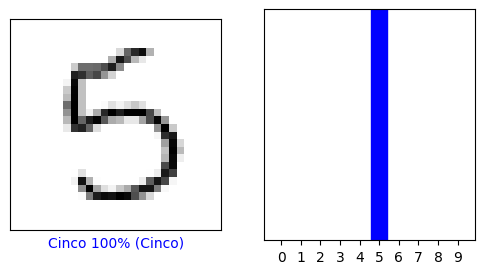

In [32]:
i = 53
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción 5

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 24ms/step
Predicción:
[[4.21886215e-09 5.45712198e-10 4.51597693e-09 1.15784788e-15
  1.35806045e-11 1.26624427e-05 9.99987125e-01 5.05087899e-12
  2.78200844e-07 6.43883742e-17]]

Número de etiqueta


6

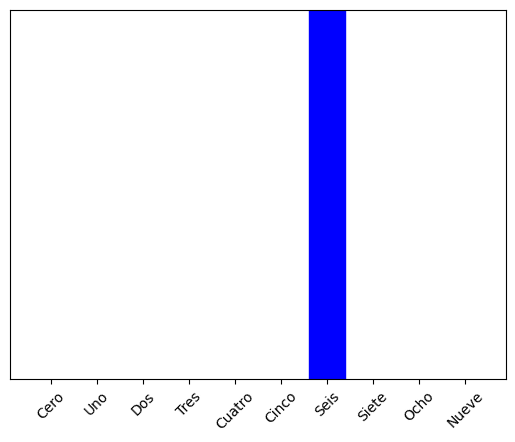

In [33]:
# Predicción de Imagenes
print('Predicción 5')
print('')

img = test_images[54]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(54, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

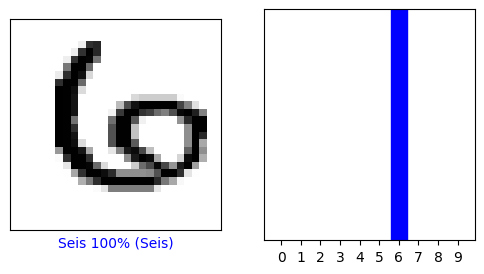

In [34]:
i = 54
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()